In [3]:
!pip install pyspark

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from pyspark.sql import SparkSession

# Создание SparkSession
spark = SparkSession.builder \
    .appName("Economic Data Analysis") \
    .config("spark.hadoop.fs.defaultFS", "hdfs://localhost:9000") \
    .config("spark.ui.port", "4050") \
    .getOrCreate()

# Установка количества разделов для shuffle операций
spark.conf.set("spark.sql.shuffle.partitions", "50")

25/05/29 21:38:03 WARN Utils: Your hostname, devopsvm resolves to a loopback address: 127.0.1.1; using 172.20.10.6 instead (on interface enp0s3)
25/05/29 21:38:03 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/05/29 21:38:05 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/05/29 21:38:10 WARN Utils: Service 'SparkUI' could not bind on port 4050. Attempting port 4051.


In [6]:
# Чтение данных из HDFS
file_path = "hdfs://localhost:9000/user2/hadoop/economic_data/DATA.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Просмотр первых строк данных
df.show(5)

+----------+---------+-------------------+--------------+-----------+------------+----------------------------+--------------------+-------------------+-------------------+-----------------------------+--------------+------------------+-----------------------------+---------+
|      DATE|UNRATE(%)|CONSUMER CONF INDEX|PPI-CONST MAT.|CPIALLITEMS|INFLATION(%)|MORTGAGE INT. MONTHLY AVG(%)|MED HOUSEHOLD INCOME|CORP. BOND YIELD(%)|MONTHLY HOME SUPPLY|% SHARE OF WORKING POPULATION|GDP PER CAPITA|QUARTERLY REAL GDP|QUARTERLY GDP GROWTH RATE (%)|CSUSHPISA|
+----------+---------+-------------------+--------------+-----------+------------+----------------------------+--------------------+-------------------+-------------------+-----------------------------+--------------+------------------+-----------------------------+---------+
|01-05-2022|      3.6|              106.4|       352.857|123.3227996| 8.581511485|                        5.23|                NULL|               4.13|                8

In [7]:
pandas_df = df.toPandas()
pandas_df.head(5)

,DATE,UNRATE(%),CONSUMER CONF INDEX,PPI-CONST MAT.,CPIALLITEMS,INFLATION(%),MORTGAGE INT. MONTHLY AVG(%),MED HOUSEHOLD INCOME,CORP. BOND YIELD(%),MONTHLY HOME SUPPLY,% SHARE OF WORKING POPULATION,GDP PER CAPITA,QUARTERLY REAL GDP,QUARTERLY GDP GROWTH RATE (%),CSUSHPISA
0,01-05-2022,3.6,106.4,352.857,123.322800,8.581511,5.2300,NaN,4.13,8.4,NaN,74737,19699.465,-0.144227,120.724
1,01-04-2022,3.6,107.3,343.730,121.978170,8.258629,4.9825,NaN,3.76,8.4,NaN,74737,19699.465,-0.144227,121.813
2,01-03-2022,3.6,107.2,345.852,121.301004,8.542456,4.1720,NaN,3.43,7.0,NaN,73289,19727.918,-0.395692,122.888
3,01-02-2022,3.8,110.5,343.583,119.702806,7.871064,3.7625,NaN,3.25,6.0,NaN,73289,19727.918,-0.395692,123.831
4,01-01-2022,4.0,113.8,345.742,118.619339,7.479872,3.4450,NaN,2.93,5.7,NaN,73289,19727.918,-0.395692,124.780


In [8]:
## Изменение типа данных

In [9]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DATE                           241 non-null    object 
 1   UNRATE(%)                      241 non-null    float64
 2   CONSUMER CONF INDEX            241 non-null    float64
 3   PPI-CONST MAT.                 241 non-null    float64
 4   CPIALLITEMS                    241 non-null    float64
 5   INFLATION(%)                   241 non-null    float64
 6   MORTGAGE INT. MONTHLY AVG(%)   241 non-null    float64
 7   MED HOUSEHOLD INCOME           224 non-null    float64
 8   CORP. BOND YIELD(%)            241 non-null    float64
 9   MONTHLY HOME SUPPLY            241 non-null    float64
 10  % SHARE OF WORKING POPULATION  236 non-null    float64
 11  GDP PER CAPITA                 241 non-null    int32  
 12  QUARTERLY REAL GDP             241 non-null    flo

In [10]:
pandas_df['DATE'] = pd.to_datetime(pandas_df['DATE'], errors='coerce')

In [11]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   DATE                           241 non-null    datetime64[ns]
 1   UNRATE(%)                      241 non-null    float64       
 2   CONSUMER CONF INDEX            241 non-null    float64       
 3   PPI-CONST MAT.                 241 non-null    float64       
 4   CPIALLITEMS                    241 non-null    float64       
 5   INFLATION(%)                   241 non-null    float64       
 6   MORTGAGE INT. MONTHLY AVG(%)   241 non-null    float64       
 7   MED HOUSEHOLD INCOME           224 non-null    float64       
 8   CORP. BOND YIELD(%)            241 non-null    float64       
 9   MONTHLY HOME SUPPLY            241 non-null    float64       
 10  % SHARE OF WORKING POPULATION  236 non-null    float64       
 11  GDP PER CAPITA     

In [12]:
# Основная статистика по числовым колонкам

In [13]:
print("\nОписательная статистика:")
print(pandas_df.describe())


Описательная статистика:
                                DATE   UNRATE(%)  CONSUMER CONF INDEX  \
count                            241  241.000000           241.000000   
mean   2011-11-22 09:39:35.103734528    6.074689            90.809544   
min              2002-01-05 00:00:00    3.500000            25.000000   
25%              2007-01-05 00:00:00    4.700000            70.400000   
50%              2012-01-05 00:00:00    5.600000            94.500000   
75%              2017-01-05 00:00:00    7.300000           108.200000   
max              2022-01-05 00:00:00   14.700000           138.400000   
std                              NaN    1.987058            25.871004   

       PPI-CONST MAT.  CPIALLITEMS  INFLATION(%)  \
count      241.000000   241.000000    241.000000   
mean       206.949863    95.539665      2.296497   
min        143.800000    75.859538     -2.097161   
25%        183.300000    87.722400      1.463784   
50%        206.200000    96.819215      2.070508   
75% 

In [14]:
!pip install pandas numpy matplotlib seaborn scikit-learn statsmodels

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.tsa.seasonal import seasonal_decompose

In [18]:
# Аналитическая обработка
# Добавление новых признаков
pandas_df['YEAR'] = pandas_df['DATE'].dt.year
pandas_df['MONTH'] = pandas_df['DATE'].dt.month
pandas_df['QUARTER'] = pandas_df['DATE'].dt.quarter

# Расчет скользящих средних
pandas_df['CPI_MA_3'] = pandas_df['CPIALLITEMS'].rolling(window=3).mean()
pandas_df['UNRATE_MA_6'] = pandas_df['UNRATE(%)'].rolling(window=6).mean()

In [22]:
# Категоризация уровня безработицы
bins_unrate = [0, 4, 7, 10, 15]
labels_unrate = ['low', 'medium', 'high', 'very_high']
pandas_df['UNRATE_CATEGORY'] = pd.cut(pandas_df['UNRATE(%)'], bins=bins_unrate, labels=labels_unrate)
# Категоризация уровня инфляции
bins_inflation = [-10, 0, 3, 6, 100]
labels_inflation = ['deflation', 'low', 'moderate', 'high']
pandas_df['INFLATION_CATEGORY'] = pd.cut(pandas_df['INFLATION(%)'], bins=bins_inflation, labels=labels_inflation)

In [23]:
pandas_df

,DATE,UNRATE(%),CONSUMER CONF INDEX,PPI-CONST MAT.,CPIALLITEMS,INFLATION(%),MORTGAGE INT. MONTHLY AVG(%),MED HOUSEHOLD INCOME,CORP. BOND YIELD(%),MONTHLY HOME SUPPLY,...,QUARTERLY REAL GDP,QUARTERLY GDP GROWTH RATE (%),CSUSHPISA,YEAR,MONTH,QUARTER,CPI_MA_3,UNRATE_MA_6,UNRATE_CATEGORY,INFLATION_CATEGORY
0,2022-01-05,3.6,106.4,352.857,123.322800,8.581511,5.2300,NaN,4.13,8.4,...,19699.465,-0.144227,120.724,2022,1,1,NaN,NaN,low,high
1,2022-01-04,3.6,107.3,343.730,121.978170,8.258629,4.9825,NaN,3.76,8.4,...,19699.465,-0.144227,121.813,2022,1,1,NaN,NaN,low,high
2,2022-01-03,3.6,107.2,345.852,121.301004,8.542456,4.1720,NaN,3.43,7.0,...,19727.918,-0.395692,122.888,2022,1,1,122.200658,NaN,low,high
3,2022-01-02,3.8,110.5,343.583,119.702806,7.871064,3.7625,NaN,3.25,6.0,...,19727.918,-0.395692,123.831,2022,1,1,120.993993,NaN,low,high
4,2022-01-01,4.0,113.8,345.742,118.619339,7.479872,3.4450,NaN,2.93,5.7,...,19727.918,-0.395692,124.780,2022,1,1,119.874383,NaN,low,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,2002-01-09,5.7,94.5,145.400,76.365830,1.514302,6.0925,42409.0,6.15,3.9,...,13531.741,0.403529,284.767,2002,1,1,76.450212,5.833333,medium,low
237,2002-01-08,5.7,97.4,145.100,76.239257,1.802817,6.2900,42409.0,6.37,4.0,...,13531.741,0.403529,290.371,2002,1,1,76.365830,5.800000,medium,low
238,2002-01-07,5.8,106.3,144.700,75.986111,1.464789,6.4850,42409.0,6.53,4.2,...,13531.741,0.403529,296.496,2002,1,1,76.197066,5.800000,medium,low
239,2002-01-06,5.8,110.3,144.300,75.901729,1.067416,6.6500,42409.0,6.63,4.2,...,13477.356,0.615502,301.704,2002,1,1,76.042365,5.766667,medium,low


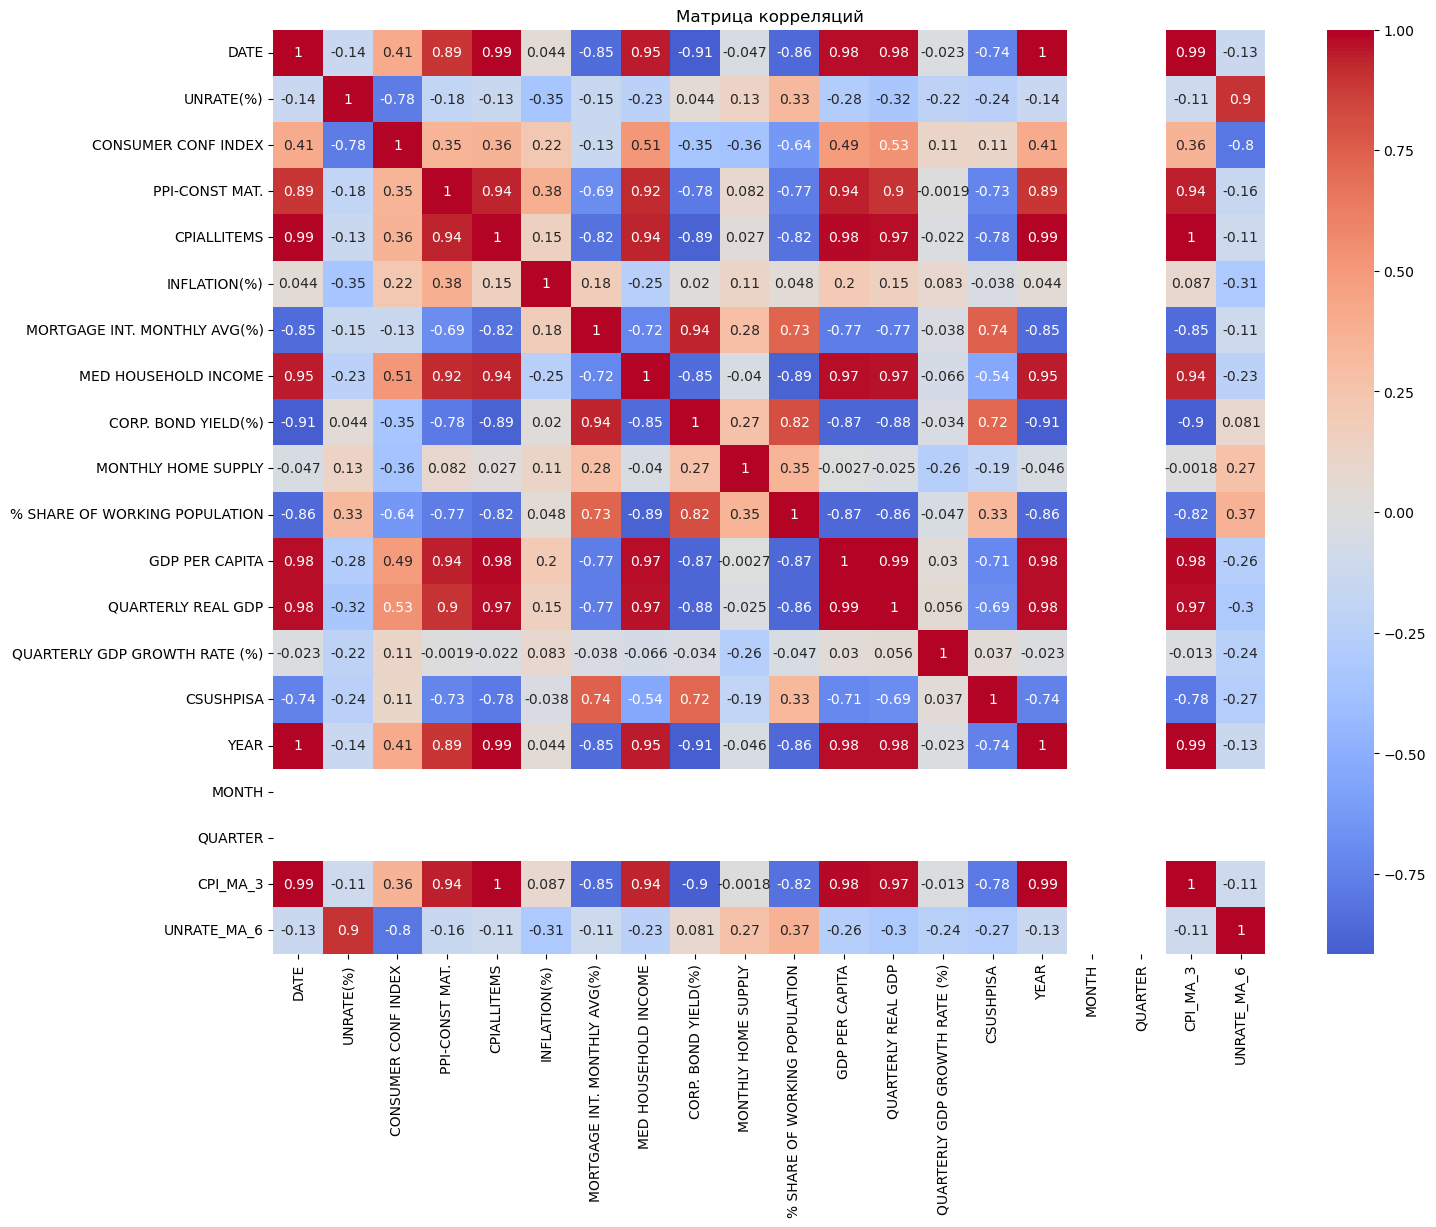

In [23]:
# Статистический анализ
# Корреляционный анализ
corr_matrix = pandas_df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций')
plt.show()

In [24]:
annual_stats = pandas_df.groupby('YEAR').agg({
    'UNRATE(%)': 'mean',
    'CPIALLITEMS': 'mean',
    'GDP PER CAPITA': 'mean',
    'QUARTERLY GDP GROWTH RATE (%)': 'mean'
}).reset_index()

In [25]:
annual_stats

,YEAR,UNRATE(%),CPIALLITEMS,GDP PER CAPITA,QUARTERLY GDP GROWTH RATE (%)
0,2002,5.800000,76.207614,38104.875,0.354195
1,2003,5.991667,77.613983,39418.500,1.057761
2,2004,5.541667,79.691893,41657.750,0.828732
3,2005,5.083333,82.395637,44050.750,0.737759
4,2006,4.608333,85.053674,46233.000,0.647104
5,2007,4.616667,87.479977,47974.750,0.535996
6,2008,5.800000,90.838421,48499.000,-0.636281
7,2009,9.283333,90.515448,47122.500,0.023733
8,2010,9.608333,91.999941,48569.250,0.690124
9,2011,8.933333,94.904233,49951.000,0.380011


In [ ]:
1. Динамика безработицы (UNRATE%)
2002–2007 гг.: Уровень безработицы снижался до 4.6% в 2007 году, что говорит о росте занятости и стабильности на рынке труда.
2008–2009 гг.: Резкий скачок безработицы до 9.3%, связанный с мировым финансовым кризисом.
2010–2020 гг.: Постепенное восстановление: уровень безработицы падает до 3.7% к 2019 году — это минимум за последние 50 лет.
2020 г.: Всплеск из-за пандемии COVID-19 (до 8.1%), но затем быстрое восстановление.
 
📌 Вывод: США демонстрируют устойчивость рынка труда: после кризисов наблюдается постепенное восстановление, хотя 2020 год стал исключением из-за внешнего шока.

 
📈 2. Инфляция (CPIALLITEMS)
2002–2007 гг.: Инфляция стабильно росла (~от 76 до 87).
2008–2009 гг.: Замедление инфляции, связанное с кризисом.
2010–2019 гг.: Стабильный рост цен (от ~92 до ~108), но в пределах целевого диапазона ФРС (2% в год).
2020–2022 гг.: Значительное ускорение инфляции (~до 121) — следствие стимулирующей политики, цепных разрывов и роста спроса.
 
📌 Вывод: После долгих лет низкой инфляции 2020–2022 годы стали периодом высокой инфляции, требующей жёсткой денежно-кредитной политики для контроля.

 
💵 3. ВВП на душу населения (GDP PER CAPITA)
2002–2007 гг.: Устойчивый рост ВВП на человека (~от $38 тыс. до $48 тыс.).
2008–2009 гг.: Замедление роста, особенно в 2009 году.
2010–2019 гг.: Непрерывный рост доходов на душу населения (+~$15 тыс. за десятилетие).
2020 г.: Краткосрочное снижение из-за пандемии.
2021 г.: Резкий рост (+~$5 тыс.), обусловленный масштабными фискальными мерами.
2022 г.: Малый прирост или небольшое снижение, возможно, из-за инфляции и замедления экономики.
 
📌 Вывод: Экономика США демонстрирует долгосрочный рост уровня жизни, несмотря на кризисы. Однако в 2022 году наблюдалось замедление роста реальных доходов.

 
📉 4. Квартальный темп роста ВВП (QUARTERLY GDP GROWTH RATE %)
2002–2007 гг.: Умеренный, но стабильный рост (~0.5–1% ежегодно).
2008 г.: Рецессия (-0.64%).
2009 г.: Слабое восстановление.
2010 г.: Быстрое восстановление (+0.69%).
2011–2019 гг.: Медленный, но устойчивый рост (в среднем ~0.5% в год).
2020 г.: Спад.
2021 г.: Высокий рост (+1.36%) — последствия стимулов и восстановления.
2022 г.: Замедление, даже слабая рецессия (-0.29%).
 
📌 Вывод: США прошли через два крупных кризиса (2008 и 2020), но восстановились. Однако 2022 год указывает на возможные проблемы в будущем — замедление экономики и влияние инфляции.

 
🔁 5. Цикличность экономики
Фазы экономического цикла:
2002–2007 гг.: Подъем.
2008–2009 гг.: Спад/рецессия.
2010–2019 гг.: Долгий, но медленный подъем.
2020 г.: Шоковая рецессия.
2021 г.: Быстрый подъем.
2022 г.: Замедление / возможная рецессия.
 
📌 Вывод: США остаются уязвимыми к внешним шокам, но сохраняют способность к восстановлению благодаря гибкой экономике и мощным фискальным/денежно-кредитным инструментам.

 
✅ Общий экономический вывод:
Стабильность и восстановление: США показали устойчивость к двум серьезным кризисам (2008 и 2020), сохранив долгосрочные тренды роста ВВП на душу населения.
Проблемы 2020–2022 гг.: Высокая инфляция, замедление экономики и рост безработицы в 2020 году потребовали ответных мер со стороны ФРС.
Перспективы: Экономика США остается одной из самых сильных в мире, но требует внимания к инфляции, бюджетному дефициту и долговой нагрузке.

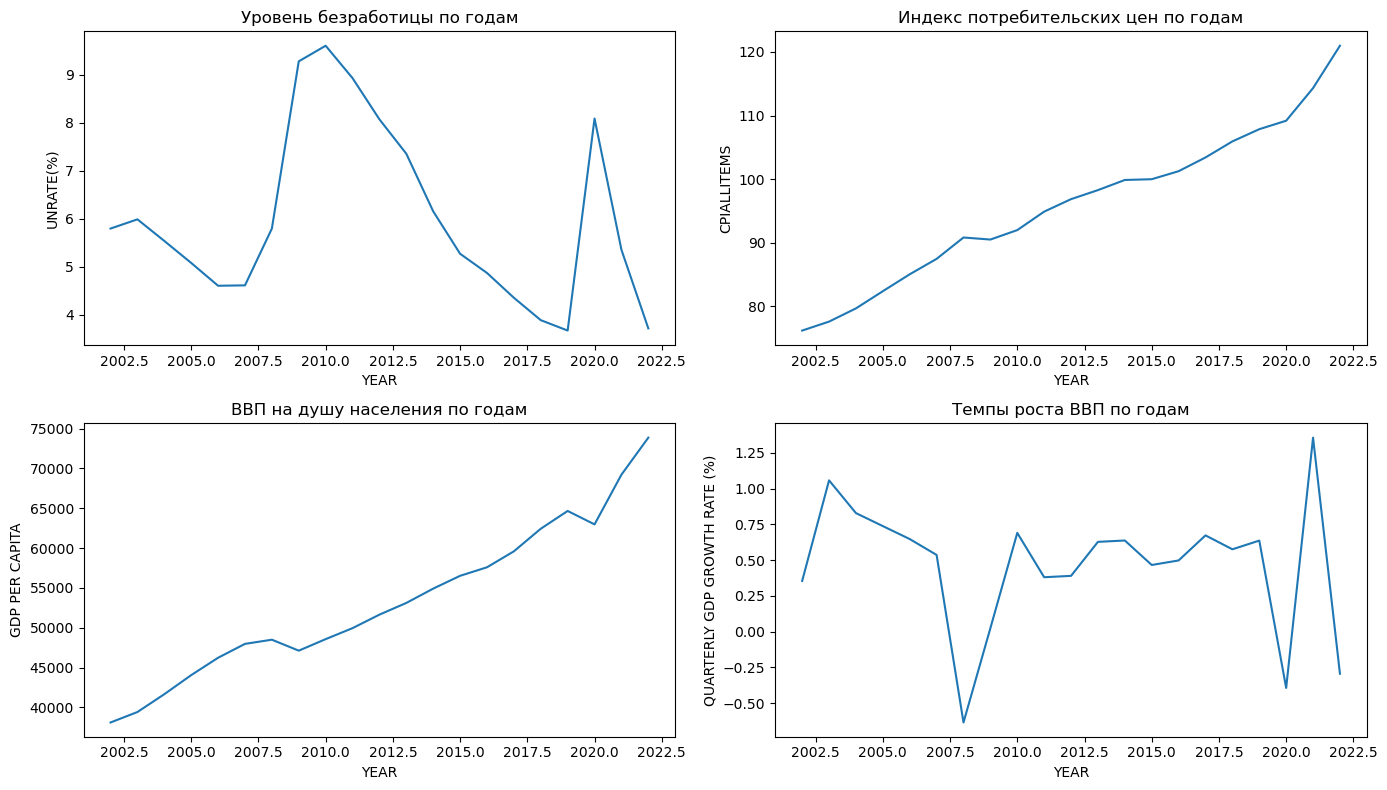

In [27]:
# 7. Визуализация результатов
# Графики динамики ключевых показателей
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
sns.lineplot(x='YEAR', y='UNRATE(%)', data=annual_stats)
plt.title('Уровень безработицы по годам')

plt.subplot(2, 2, 2)
sns.lineplot(x='YEAR', y='CPIALLITEMS', data=annual_stats)
plt.title('Индекс потребительских цен по годам')

plt.subplot(2, 2, 3)
sns.lineplot(x='YEAR', y='GDP PER CAPITA', data=annual_stats)
plt.title('ВВП на душу населения по годам')

plt.subplot(2, 2, 4)
sns.lineplot(x='YEAR', y='QUARTERLY GDP GROWTH RATE (%)', data=annual_stats)
plt.title('Темпы роста ВВП по годам')

plt.tight_layout()
plt.show()

In [25]:
spark_df = spark.createDataFrame(pandas_df)

# Write the Spark DataFrame to HDFS
spark_df.write.csv(processed_path, header=True, mode="overwrite")